# Ildebrando Magnani

## Econ - Problem Set 4 

### Exercise 1:

In [209]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as lin
import scipy.integrate as intgr
import scipy.optimize as opt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from math import gamma
from scipy.special import beta

In [210]:
data = np.loadtxt('/Users/ildebrandomagnani/Desktop/Wk4_StrEst/data/clms.txt')
n = len(data)

In [211]:
mu = np.mean(data)
var = np.var(data)

print("Mean =", np.mean(data))
print("Median =", np.median(data))
print("Minimum =", np.min(data))
print("Maximum =", np.max(data))
print("Standard Deviation =", np.std(data))
print("Number of observations =", n)

Mean = 720.277975327
Median = 172.21
Minimum = 0.01
Maximum = 227967.25
Standard Deviation = 3972.66375639
Number of observations = 10619


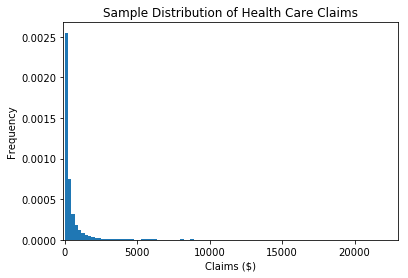

In [123]:
hh = plt.hist(data, bins=1000, normed=True)
plt.title("Sample Distribution of Health Care Claims")
plt.xlabel("Claims ($)")
plt.ylabel("Frequency")
plt.xlim(-100, 23000)
plt.show()

In [124]:
subsample = data[data<800]
h = plt.hist(subsample, bins=100, normed=False)

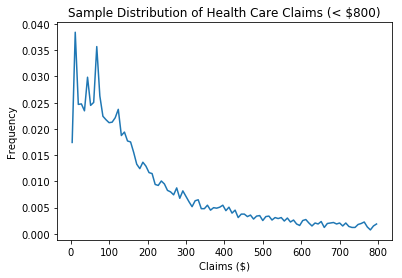

In [169]:
freqs = h[0] / n
bins_middle_points = (h[1][0:-1] + h[1][1:]) / 2

plt.plot(bins_middle_points, freqs)
plt.title("Sample Distribution of Health Care Claims (< $800)")
plt.xlabel("Claims ($)")
plt.ylabel("Frequency")
plt.show()

### MLE with Gamma Distribution:

In [144]:
# shape = shape parameter = alpha
# rate = rate paramenter = beta

def Gamma_pdf(x, shape, rate):
    
    numerator = (x**(shape-1)) * np.exp(-x/rate)
    
    return numerator / (gamma(shape) * (rate**shape))


def log_lik_Gamma(x_vals, shape, rate):
    
    pdf_vals = Gamma_pdf(x_vals, shape, rate)
    log_pdf_vals = np.log(pdf_vals)
    log_lik_val = np.sum(log_pdf_vals)
    
    return log_lik_val


def crit_Gamma(params, xvals):
    
    shape, rate = params
    log_lik_val = log_lik_Gamma(xvals, shape, rate)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val

In [170]:
beta_0 = var / mu  
alpha_0 = mu /beta_0  
params_init = np.array([alpha_0, beta_0])
mle_args = (data)
results = opt.minimize(crit_Gamma, params_init, args=(mle_args), method='L-BFGS-B', 
                            bounds=((1e-10, None), (1e-10, None)))
alpha_MLE0, beta_MLE0 = results.x
print('alpha_MLE=',alpha_MLE0, ', beta_MLE=', beta_MLE0)
print('Log-Likelihood function evaluated at MLE parameters:', log_lik_Gamma(data, alpha_MLE0, beta_MLE0))

alpha_MLE= 0.221755318824 , beta_MLE= 21911.0646993
Log-Likelihood function evaluated at MLE parameters: -82076.4516057


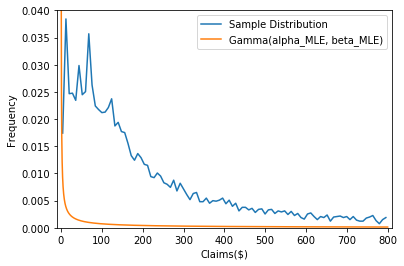

In [202]:
X = np.linspace(0.0001, 800, 20000)
gamma_MLE_vals = Gamma_pdf(X, alpha_MLE0, beta_MLE0)
plt.plot(bins_middle_points, freqs, label = 'Sample Distribution')
plt.plot(X, gamma_MLE_vals, label = "Gamma(alpha_MLE, beta_MLE)")
plt.xlabel('Claims($)')
plt.ylabel('Frequency')
plt.legend(loc = 'upper right')
plt.xlim(-10,810)
plt.ylim(0,0.04)
plt.show()

 ### MLE with Generalized Gamma Distribution:

In [185]:
def GenGamma_pdf(x, shape, rate, m):
    
    numerator = m * (x**(shape-1)) * np.exp(-(x/rate)**m)
    
    return numerator / ((rate**shape)*gamma(shape/m))


def log_lik_GenGamma(x_vals, shape, rate, m):
    
    pdf_vals = GenGamma_pdf(x_vals, shape, rate, m)
    log_pdf_vals = np.log(pdf_vals)
    log_lik_val = np.sum(log_pdf_vals)
    
    return log_lik_val
    
    
def crit_GenGamma(params, xvals):
    
    shape, rate, m = params
    log_lik_val = log_lik_GenGamma(xvals, shape, rate, m)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val

In [186]:
beta_0 = beta_MLE0
alpha_0 = alpha_MLE0
m_0 = 1
params_init = np.array([alpha_0, beta_0, m_0])
mle_args = (data)
results = opt.minimize(crit_GenGamma, params_init, args=(mle_args), method='L-BFGS-B', 
                            bounds=((1e-10, None), (1e-10, None), (1e-10, None)))
alpha_MLE1, beta_MLE1, m_MLE1 = results.x
print('alpha_MLE =',alpha_MLE1, ', beta_MLE =', beta_MLE1, ', m_MLE =', m_MLE1)
print('Log-Likelihood function evaluated at MLE parameters:', log_lik_GenGamma(data, alpha_MLE1, beta_MLE1, m_MLE1))

alpha_MLE = 0.221764848112 , beta_MLE = 21911.0644282 , m_MLE = 0.997072927436
Log-Likelihood function evaluated at MLE parameters: -82076.4467958


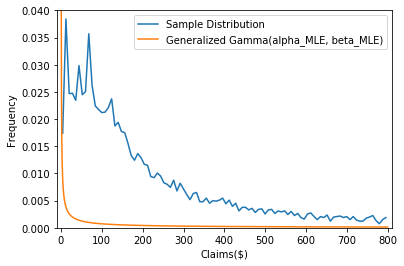

In [187]:
GenGamma_MLE_vals = GenGamma_pdf(X, alpha_MLE1, beta_MLE1, m_MLE1)
plt.plot(bins_middle_points, freqs, label = 'Sample Distribution')
plt.plot(X, GenGamma_MLE_vals, label = "Generalized Gamma(alpha_MLE, beta_MLE)")
plt.xlabel('Claims($)')
plt.ylabel('Frequency')
plt.legend(loc = 'upper right')
plt.xlim(-10,810)
plt.ylim(0,0.04)
plt.show()

### MLE with Beta 2 Distribution:

In [189]:
def Beta2_pdf(x, a, b, p, q):
    
    B = beta(p, q)
    
    numerator = a * (x**(a*p - 1))
    denominator = (b**(a*p))*B*((1 + (x/b)**a)**(p + q))
    
    return numerator / denominator


def log_lik_Beta2(x_vals, a, b, p, q):
    
    pdf_vals = Beta2_pdf(x_vals, a, b, p, q)
    log_pdf_vals = np.log(pdf_vals)
    log_lik_val = np.sum(log_pdf_vals)
    
    return log_lik_val


def crit_Beta2(params, xvals):
    
    a, b, p, q = params
    log_lik_val = log_lik_Beta2(xvals, a, b, p, q)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val

In [198]:
a_0 = alpha_MLE1
b_0 = beta_MLE1
p_0 = m_MLE1
q_0 = 10

params_init = np.array([a_0, b_0, p_0, q_0])
mle_args = (data)
results = opt.minimize(crit_Beta2, params_init, args=(mle_args), method='L-BFGS-B', 
                            bounds=((1e-10, None), (1e-10, None), (1e-10, None), (1e-10, None)))
a_MLE, b_MLE, p_MLE, q_MLE = results.x
print('a_MLE =',a_MLE, ', b_MLE =', b_MLE, ', p_MLE =', p_MLE, 'q_MLE =', q_MLE)
print('Log-Likelihood function evaluated at MLE parameters:', log_lik_GenGamma(data, alpha_MLE1, beta_MLE1, m_MLE1))

a_MLE = 0.121944209084 , b_MLE = 21911.0489671 , p_MLE = 46.7747595089 q_MLE = 83.3077119677
Log-Likelihood function evaluated at MLE parameters: -82076.4467958


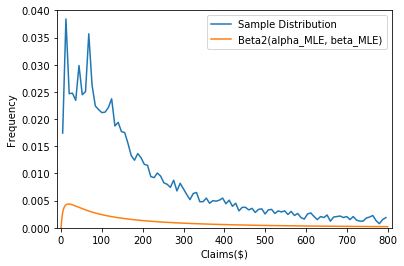

In [200]:
Beta2_MLE_vals = Beta2_pdf(X, a_MLE, b_MLE, p_MLE, q_MLE)
plt.plot(bins_middle_points, freqs, label = 'Sample Distribution')
plt.plot(X, Beta2_MLE_vals, label = "Beta2(alpha_MLE, beta_MLE)")
plt.xlabel('Claims($)')
plt.ylabel('Frequency')
plt.legend(loc = 'upper right')
plt.xlim(-10,810)
plt.ylim(0,0.04)
plt.show()

### Testing:

In [214]:
B2_loglik = log_lik_Beta2(data, a_MLE, b_MLE, p_MLE, q_MLE)
Gamma_loglik = log_lik_Gamma(data, alpha_MLE0, beta_MLE0)
GenGamma_loglik = log_lik_GenGamma(data, alpha_MLE1, beta_MLE1, m_MLE1)

LR_Gamma = 2 * (B2_loglik - Gamma_loglik)
LR_GenGamma = 2 * (B2_loglik - GenGamma_loglik)

print("LR Test for Gamma (vs Beta 2):", LR_Gamma)
print("LR Test for Generalized Gamma (vs Beta2) :", LR_GenGamma)

LR Test for Gamma (vs Beta 2): 14425.4377655
LR Test for Generalized Gamma (vs Beta2) : 14425.4281457
